In [19]:
import random
import os
from typing import NamedTuple

import numpy as np
import torch
import torchvision
from torch.utils import data
from PIL import Image
import torch.nn.functional as F

import model
from tensor_transforms import convert_to_coord_format

In [2]:
class CIPS64Arguments(NamedTuple):
    """CIPSskip for LSUN-Churches-256"""
    Generator = 'CIPSskip'
    output_dir = '800000.pt'
    out_path = 'outputs/skip-churches-64/checkpoints'
    size = 64
    coords_size = 64
    fc_dim = 512 
    latent = 512
    style_dim = 512
    n_mlp = 8
    activation = None
    channel_multiplier = 2
    ckpt = os.path.join(out_path, output_dir)
    coords_integer_values = False

In [3]:
class CIPSSR64Arguments(NamedTuple):
    """CIPSskip for LSUN-Churches-256"""
    Generator = 'CIPSskip'
    output_dir = '800000.pt'
    out_path = 'outputs/skip-churches-16-64/checkpoints'
    size = 16
    coords_size = 64
    fc_dim = 512 
    latent = 512
    style_dim = 512
    n_mlp = 8
    activation = None
    channel_multiplier = 2
    ckpt = os.path.join(out_path, output_dir)
    coords_integer_values = False

In [4]:
args = CIPS64Arguments()
device = 'cuda'

In [5]:
Generator = getattr(model, args.Generator)
g_ema = Generator(size=args.size, hidden_size=args.fc_dim, style_dim=args.latent, n_mlp=args.n_mlp,
                  activation=args.activation, channel_multiplier=args.channel_multiplier,
                  ).to(device)
g_ema.eval();

In [6]:
CIPS_embedding = g_ema.emb.input.clone()

In [7]:
args = CIPSSR64Arguments()
device = 'cuda'

In [8]:
Generator = getattr(model, args.Generator)
g_ema = Generator(size=args.size, hidden_size=args.fc_dim, style_dim=args.latent, n_mlp=args.n_mlp,
                  activation=args.activation, channel_multiplier=args.channel_multiplier,
                  ).to(device)
g_ema.eval();

In [9]:
CIPSSR_embedding = g_ema.emb.input.clone()

In [14]:
CIPSSR_embedding = CIPSSR_embedding.view(512, -1).t()
CIPS_embedding = CIPS_embedding.view(512, -1).t()

In [43]:
U_sr, S_sr, V_sr = torch.pca_lowrank(CIPSSR_embedding)
U, S, V = torch.pca_lowrank(CIPS_embedding)

CIPSSR_emb = CIPSSR_embedding @ V_sr[:, :3]
CIPS_emb = CIPS_embedding @ V[:, :3]

In [44]:
CIPSSR_emb = CIPSSR_emb.reshape(1, -1, 16, 16)
CIPSSR_emb_64 = F.interpolate(CIPSSR_emb, size=(64, 64), mode='bilinear')[0]
CIPS_emb = CIPS_emb.reshape(64, 64, -1)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [45]:
import matplotlib.pyplot as plt

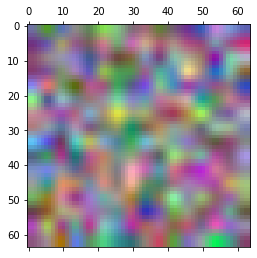

In [46]:
CIPSSR_emb_64 = CIPSSR_emb_64 - CIPSSR_emb_64.min()
CIPSSR_emb_64 = CIPSSR_emb_64 / CIPSSR_emb_64.max()
plt.matshow(CIPSSR_emb_64.permute(1,2,0).detach().cpu().numpy())

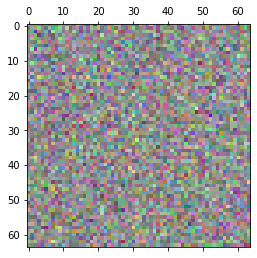

In [47]:
CIPS_emb = CIPS_emb - CIPS_emb.min()
CIPS_emb = CIPS_emb / CIPS_emb.max()
plt.matshow(CIPS_emb.detach().cpu().numpy())

In [39]:
CIPSSR_emb

tensor([[[[ 3.2814e+00, -2.8981e+00,  2.1111e+00, -1.2785e+00, -3.3144e-01,
            2.0994e-01, -1.8401e+00,  2.2010e+00,  5.8621e-01, -3.2370e+00,
           -5.2805e-01,  3.2061e+00,  2.7612e+00,  8.4209e+00, -2.8308e+00,
           -1.1469e-01],
          [ 1.2960e+00,  9.5526e-01, -4.8830e-01,  1.0284e+00, -8.6500e-01,
           -4.2195e+00,  7.2838e-01, -2.1230e+00,  9.7967e-01,  3.2692e+00,
           -6.7956e-01,  3.0478e+00,  2.9732e+00,  4.7899e-01, -7.2367e-01,
           -1.2272e+00],
          [-4.4539e-01, -1.7552e+00, -3.7868e+00,  2.3199e+00,  1.1674e+00,
            1.1204e+00, -3.6865e+00, -1.3042e+00, -7.7009e-01, -1.2579e+00,
           -4.7235e-01,  2.6372e+00, -2.1161e+00, -2.7461e+00, -2.9732e+00,
           -2.4500e+00],
          [ 2.3437e+00,  8.5379e-01,  2.5366e-01, -4.4393e-01,  2.8085e+00,
            2.4712e+00,  9.1713e-01, -1.3277e+00, -1.5966e+00, -9.7885e-01,
            2.4168e-02, -3.7559e-02, -2.0942e+00, -4.4213e+00,  2.3264e+00,
           -2